
The two datasets are related to red and white variants of the wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced.The comparitive analysis of machine learning models has been done.



## About Dataset

__1.  fixed acidity:__ Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

__2.  volatile acidity:__ The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

__3.  citric acid:__ Found in small quantities, citric acid can add 'freshness' and flavor to wines.

__4.  residual sugar:__ The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

__5.  chlorides:__ The amount of salt in the wine.

__6.  free sulfur dioxide:__ The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.

__7.  total sulfur dioxide:__ Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

__8.  density:__ The density of water is close to that of water depending on the percent alcohol and sugar content.

__9.  pH:__ Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

__10. sulphates:__ A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

__11. alcohol:__ The percent alcohol content of the wine.

__12. quality:__ Output variable (based on sensory data, score between 0 and 10).

# Implimentation

In [2]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import random
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.neighbors import KNeighborsClassifier # KNN Model

# [01] Read Data

In [4]:
wine = pd.read_csv(r'C:\Users\hp\Desktop\winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

# Here we can see there is no null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isnull().sum()

# No null values present in data frame.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.shape

# Total data points are 1599

(1599, 12)

In [9]:
wine.columns

# List of features we have in this dataset.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Here we can say most of wines are between 5 to 6 range which is average. 3 is the lowest qulity and 8 is the highest.

# [02] EDA

## [2.1] Corelation Matrix: Visualise the similarity between features

In [11]:
# we are creating a correlation matrix to identify the important attributes
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## [2.2] Heat Map using corelation metrix:

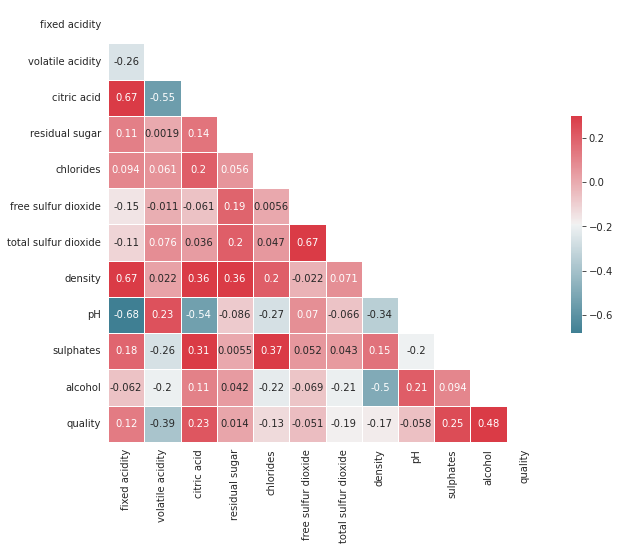

In [12]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Observation:

from here we notice that impact of **'residual sugar'**, **'free sulfur dioxide'** and **'ph'** on **'quality'** is neglisible. So we can drop them. Also we observer that similarity between **'alcohol'** and **'quality'** is maximum.

In [13]:
wine.drop(['residual sugar','free sulfur dioxide','pH'],axis = 1,inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


## [2.3] Univariate Analysis: On Alcohol

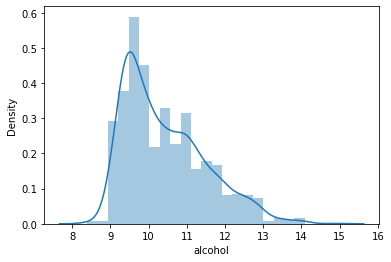

In [14]:
# Since we found out that alcohol is very closely related to quality therefore we check for the same
sns.distplot(wine['alcohol'])
plt.show()

To analyze more,

Let's split **'alcohol'** into three parts such as, **low, median and high**.

In [15]:
bins = [0, 10, 12, 15]
labels = ["low","median","high"]
wine['alcohol_label'] = pd.cut(wine['alcohol'], bins=bins, labels=labels)
wine.drop('alcohol',axis =1, inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality,alcohol_label
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,5,low
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,5,low
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,6,low
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low


## [2.4] Univariate Analysis: On Quality

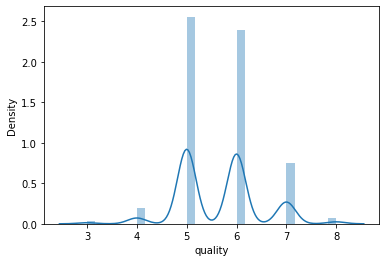

In [16]:
sns.distplot(wine['quality'])
plt.show()

Similarly as alcohol, 

We can split **quality** also into three small chuncks such as **poor** i.e. from 0 to 4, **normal** i.e. from 5 or 6 and **excellent** i.e. from 7 to 10.

In [17]:
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
wine['quality_label'] = pd.cut(wine['quality'], bins=bins, labels=labels)
wine.drop('quality',axis =1, inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol_label,quality_label
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,low,normal
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,low,normal
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,low,normal
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,low,normal
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,low,normal


## [2.5] Multivariate Analysis: Using Pairplots

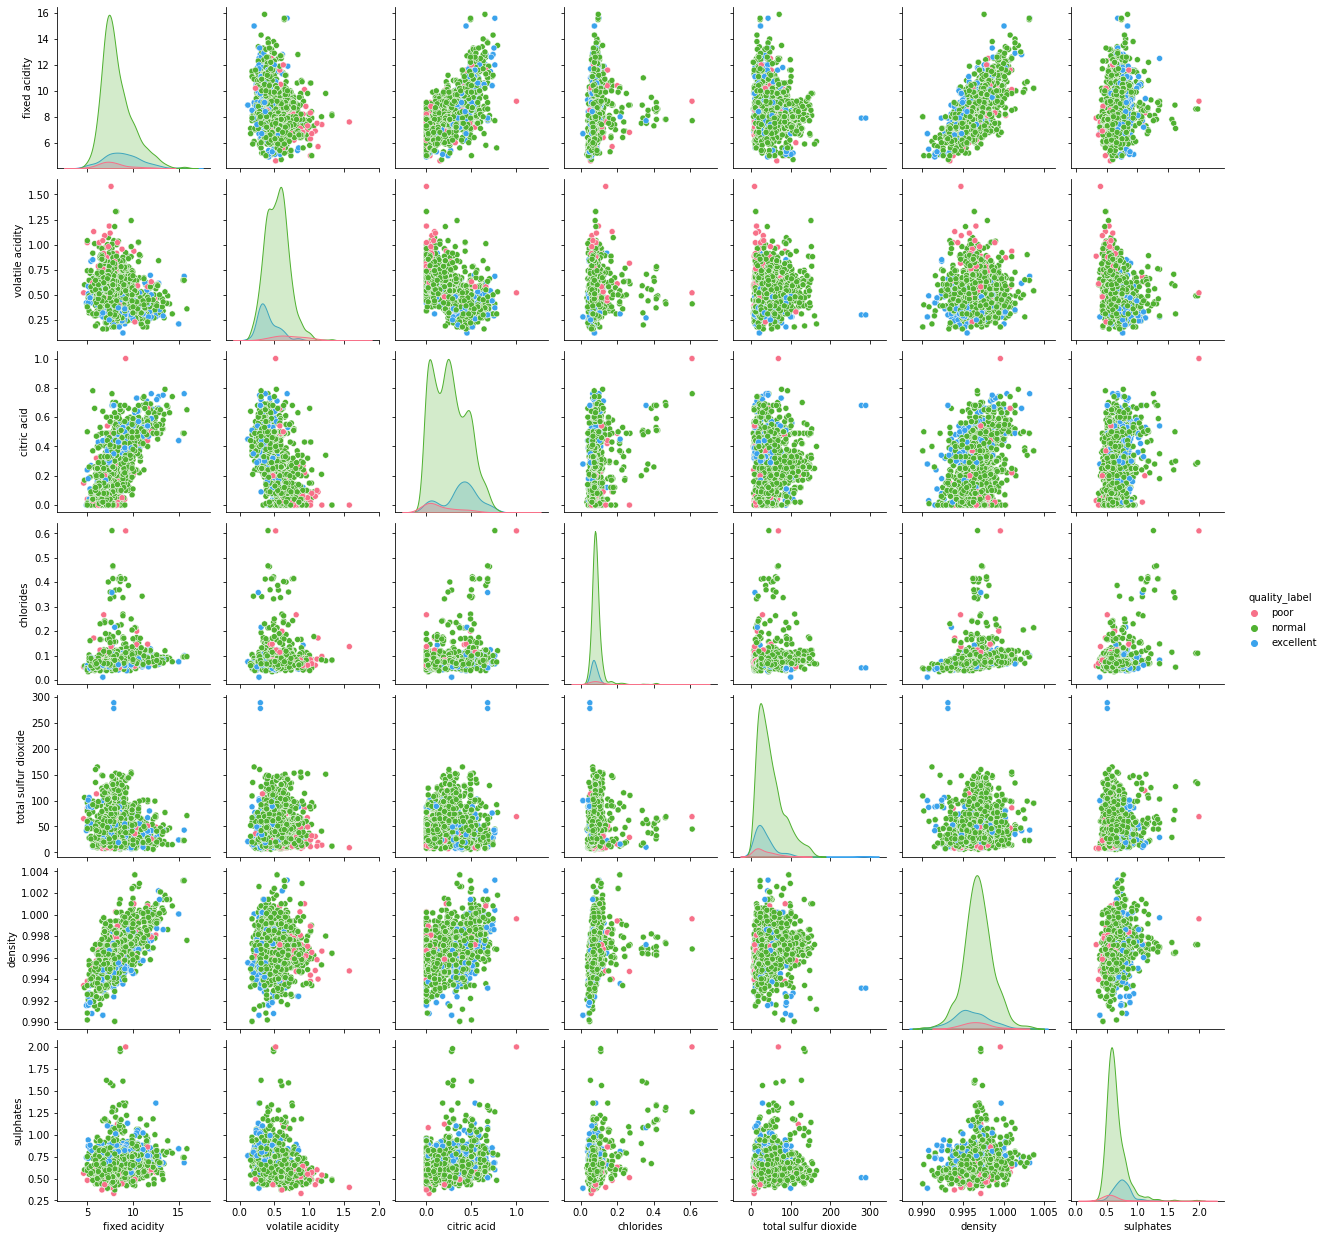

In [18]:
sns.pairplot(wine, hue="quality_label", palette="husl",diag_kind="kde")
plt.show()

Observation:

To betermine wine qulity, **volatile acidity and citric acid** can be our important features as the overlap of their distributions are vary less in compare to others.

## [2.6] Analysis On: Volatile Acidity and Citric Acid

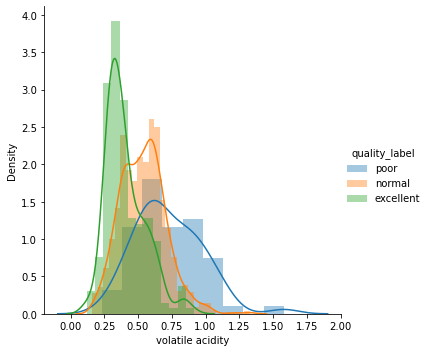

In [19]:
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'volatile acidity').add_legend()
plt.show()

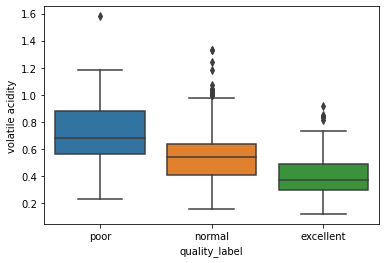

In [20]:
sns.boxplot(x='quality_label',y='volatile acidity', data=wine)
plt.show()

Observation:

From this plot we can assure that, More than 50% of our excellent catagory wine have volatile acidity in between 0.3 to 0.5.

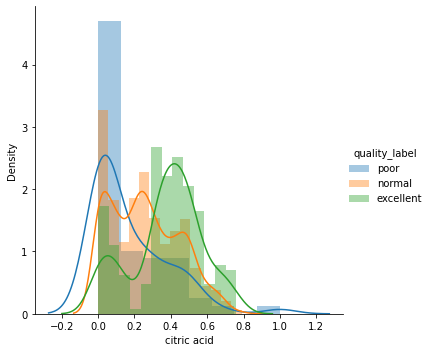

In [21]:
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'citric acid').add_legend()
plt.show()

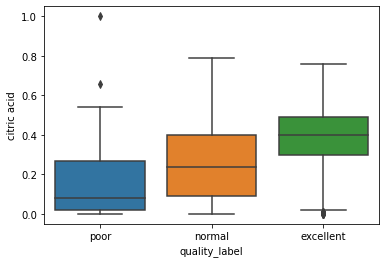

In [22]:
sns.boxplot(x='quality_label', y='citric acid',data=wine)
plt.show()

Observation:

Similary from this plot we can say, More than 50% of our excellent catagory wine have citric acid in between 0.3 to 0.5.

# [03] Model Creation

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   chlorides             1599 non-null   float64 
 4   total sulfur dioxide  1599 non-null   float64 
 5   density               1599 non-null   float64 
 6   sulphates             1599 non-null   float64 
 7   alcohol_label         1599 non-null   category
 8   quality_label         1599 non-null   category
dtypes: category(2), float64(7)
memory usage: 91.0 KB


In [24]:
wine['alcohol_label'].value_counts()

low       747
median    711
high      141
Name: alcohol_label, dtype: int64

In [25]:
# Convert category values to numeric values by creating dummy featutes.
df_wine = pd.get_dummies(wine, columns=['alcohol_label'], drop_first=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality_label,alcohol_label_median,alcohol_label_high
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,normal,0,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,normal,0,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,normal,0,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0


In [26]:
result = df_wine['quality_label']
df_wine.drop(['quality_label'], axis=1, inplace=True)
print(df_wine.shape, result.shape)

(1599, 9) (1599,)


In [27]:
# use 80% of the data for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_wine, result, test_size=0.2, random_state=11)

When we deal with distance that case we need to standadise our data other wise we can use normal data. In our case for KNN we need scdardise data.

## KNN Model

In [28]:
# For KNN our dataset must have to standardised.
# No need standardised quality_label as it is the result column

scaler = StandardScaler()
scaler.fit(df_wine)
scaled_features = scaler.transform(df_wine)
df_wine_sc = pd.DataFrame(scaled_features, columns=df_wine.columns)

In [29]:
# use 80% of the data for training and 20% for testing
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_wine_sc, result, test_size=0.2, random_state=11)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [31]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
# Train the model on the training data
knn.fit(X_train_sc, y_train_sc)

KNeighborsClassifier()

In [38]:
# Make predictions on the test data
y_pred = knn.predict(X_test_sc)

In [40]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test_sc, y_pred)
print("Accuracy of KNN classifier on testing data: {:.2f}%".format(accuracy * 100))

Accuracy of KNN classifier on testing data: 84.69%


In [42]:
# Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test_sc, y_pred)
# Print the confusion matrix
print(cm)

[[ 20  31   0]
 [  6 250   1]
 [  1  10   1]]


In [43]:
# Printing Classification Report (Precision, Recall, F1-Score, Accuracy, etc.)
from sklearn.metrics import classification_report
print(classification_report(y_test_sc, y_pred))

              precision    recall  f1-score   support

   excellent       0.74      0.39      0.51        51
      normal       0.86      0.97      0.91       257
        poor       0.50      0.08      0.14        12

    accuracy                           0.85       320
   macro avg       0.70      0.48      0.52       320
weighted avg       0.83      0.85      0.82       320



In [63]:
y_train_pred = knn.predict(X_train_sc)

In [65]:
# Compute the accuracy score on the training data
train_acc = accuracy_score(y_train_sc, y_train_pred)
print("Accuracy on training data:", train_acc)

Accuracy on training data: 0.8803752931978108


## SVM [Linear]

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [71]:
# use 80% of the data for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_wine, result, test_size=0.2, random_state=11)

In [72]:
# Initialize the SVM classifier
svm = SVC(kernel='linear')

In [73]:
# Train the SVM classifier on the training data
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [74]:
# Predict the labels for the testing data
y_pred = svm.predict(X_test)

In [75]:
# Calculate the accuracy of the SVM classifier on the testing data
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of SVM classifier on testing data: {:.2f}%".format(accuracy * 100))

Accuracy of SVM classifier on testing data: 80.31%


In [76]:
# Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(Y_test, y_pred)
# Print the confusion matrix
print(cm)

[[  0  51   0]
 [  0 257   0]
 [  0  12   0]]


In [77]:
# Printing Classification Report (Precision, Recall, F1-Score, Accuracy, etc.)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        51
      normal       0.80      1.00      0.89       257
        poor       0.00      0.00      0.00        12

    accuracy                           0.80       320
   macro avg       0.27      0.33      0.30       320
weighted avg       0.65      0.80      0.72       320



In [78]:
# Predict the target variable on the training data
y_pred_train = svm.predict(X_train)
# Compute the accuracy score on the training data
train_acc = accuracy_score(Y_train, y_pred_train)
print("Accuracy on training data:", train_acc)

Accuracy on training data: 0.8303362001563722


## Naive Bayes Classifier

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [82]:
from sklearn.model_selection import train_test_split
# use 80% of the data for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_wine, result, test_size=0.2, random_state=11)

In [83]:
# Train a Gaussian Naive Bayes classifier on the training data
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [84]:
# Use the trained model to make predictions on the testing data
y_pred = gnb.predict(X_test)

In [85]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of Naive Bayes classifier on testing data: {:.2f}%".format(accuracy * 100))

Accuracy of Naive Bayes classifier on testing data: 78.12%


In [86]:
# Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(Y_test, y_pred)
# Print the confusion matrix
print(cm)

[[ 28  23   0]
 [ 24 220  13]
 [  0  10   2]]


In [87]:
# Printing Classification Report (Precision, Recall, F1-Score, Accuracy, etc.)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

   excellent       0.54      0.55      0.54        51
      normal       0.87      0.86      0.86       257
        poor       0.13      0.17      0.15        12

    accuracy                           0.78       320
   macro avg       0.51      0.52      0.52       320
weighted avg       0.79      0.78      0.79       320



In [88]:
# Predict the target variable on the training data
y_pred_train = gnb.predict(X_train_sc)
# Compute the accuracy score on the training data
train_acc = accuracy_score(Y_train, y_pred_train)
print("Accuracy on training data:", train_acc)


Accuracy on training data: 0.1524628616106333


## RESULT

1. KNN : 84.69
2. SVM (Linear) : 80.31
3. Naive Bayes : 78.12 
testing data